In [26]:
import pandas as pd

In [27]:
# invoque %matplotlib in line
%matplotlib inline

## Dataset #1

In [28]:
# dataset
fp = 'data\helsinki_test.csv'

# Create dataframe from dataset
data = pd.read_csv(fp,  
                   na_values=['*', '**', '***', '****', '*****', '******'],
                   usecols=['YR--MODAHRMN', 'TEMP', 'MAX', 'MIN'],
                   parse_dates=['YR--MODAHRMN'], index_col='YR--MODAHRMN'
                  )

In [29]:
print(data.head())
print(data.tail())

                     TEMP  MAX  MIN
YR--MODAHRMN                       
2017-05-01 00:00:00  31.0  NaN  NaN
2017-05-01 00:20:00  30.0  NaN  NaN
2017-05-01 00:50:00  30.0  NaN  NaN
2017-05-01 01:00:00  31.0  NaN  NaN
2017-05-01 01:20:00  30.0  NaN  NaN
                     TEMP  MAX  MIN
YR--MODAHRMN                       
2017-08-31 19:00:00  64.0  NaN  NaN
2017-08-31 20:00:00  64.0  NaN  NaN
2017-08-31 21:00:00  64.0  NaN  NaN
2017-08-31 22:00:00  64.0  NaN  NaN
2017-08-31 23:00:00  64.0  NaN  NaN


## Let's plot a dataframe
- Basic `x-y` plot

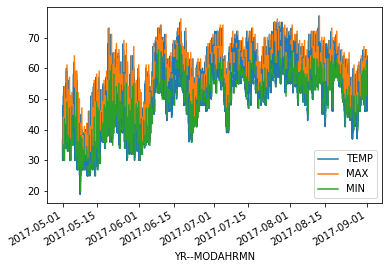

In [30]:
ax = data.plot()

__Selecting our plotting data__

In [109]:
# selecting data column and the desired data range first
oct1_temps= data['TEMP'].loc[data.index >= '201708311200']

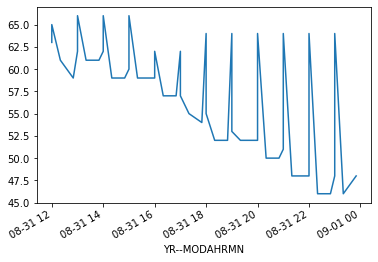

In [110]:
ax= oct1_temps.plot()

## Basic plot formating
- By addind labels and title we can make a plot look nicer

In [113]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Temperature [°F]')

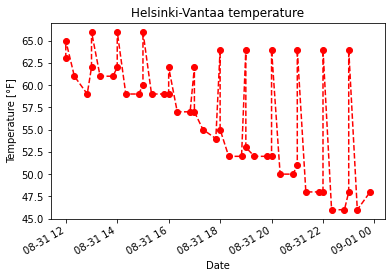

In [143]:
ax = oct1_temps.plot(style= 'ro--', title='Helsinki-Vantaa temperature')
ax.set_xlabel('Date')
ax.set_ylabel('Temperature [°F]')


Now seeing the temperature plotted with red dashed line with circles showing the data points. This come from `style= 'ro--'`. In this case `r` is for `red`, `o` is for the circles, and `--` is for the dashes line

__Adding text to the plot__

Text(2017-08-31 15:20:00, 50, 'testing')

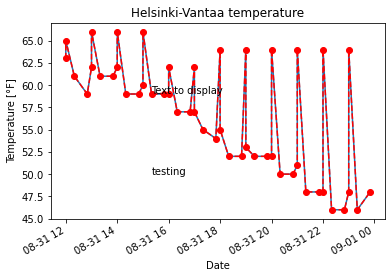

In [141]:
fig=  plt.figure()
ax = fig.gca()
oct1_temps.plot(ax=ax)

ax = oct1_temps.plot(style= 'ro--', title='Helsinki-Vantaa temperature')
ax.set_xlabel('Date')
ax.set_ylabel('Temperature [°F]')

# adding text to the plot
i=10 # define a value for index location
ax.text(oct1_temps.index[i], oct1_temps.iloc[i], 'Text to display')
# another way
ax.text(oct1_temps.index[i], 50, 'testing')


__Changing the axis ranges__
<br>
Changing the plot axes can be done by using  the `xlim` and `ylim` parameters of `plot` function
- where `xmin` should be the minimum bound of the `x-axis`, xmax should be the maximum bound, and the same goes for the `y-axis` with `ymin` and ymax.

In [ ]:
# data.plot(xlim= [xmin, xmax], ylim= [ymin, ymax])

## Dealing with Datetime Index

Placing text & changing the axis ranges using datetime index for the df in used. To do either thing, 1st define x-values using a datetime object. the easiest way to do this is using Pandas `pd.to_datetime()` function, converts string date into datetime obj. 
<br>
To convert `13:00 on October 1, 2017` from the character string `'201710011300'` to datime equivalent by typing,


In [144]:
pd.to_datetime('201710011300')

Timestamp('2017-10-01 13:00:00')

__Let's now consider modify version of the plot above__
<br>
1. Limit time range to `12:00` to `15:00` on August 1, 2017
2. Only look to temperatures between 40-46° Fahrenheit
3. Add text to note the coldest part of the afternoon

Text(2017-08-31 21:20:00, 46, 'Coldest time ->')

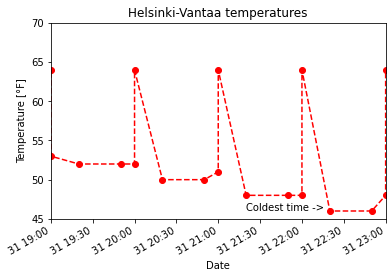

In [159]:
# from text to datetime object
start_time = pd.to_datetime('201708311900')
end_time = pd.to_datetime('201708312300')
cold_time = pd.to_datetime('201708312120')

ax = oct1_temps.plot(style='ro--', title= 'Helsinki-Vantaa temperatures',
                    xlim=[start_time, end_time], ylim=[45.0, 70.0])

ax.set_xlabel('Date')
ax.set_ylabel('Temperature [°F]')
ax.text(cold_time, 46, 'Coldest time ->')

## Dataset #2

In [161]:
# dataset
fp = 'data\helsinki.csv'

# Create dataframe from dataset
data_v2 = pd.read_csv(fp,
                   usecols=['YM', 'monthNumber', 'TAVG_Celsius', 'avgTempsC', 'month', 'Diff'],
                   parse_dates=['YM'], index_col='YM'

                     )

In [162]:
print(data_v2.head())
print(data_v2.tail())

        monthNumber  TAVG_Celsius  avgTempsC     month      Diff
YM                                                              
195201            1     -1.400966  -5.877342   January  4.476376
195202            2     -4.000000  -6.990482  February  2.990482
195203            3    -10.106838  -3.841270     March -6.265568
195204            4      4.226190   2.427875     April  1.798315
195205            5      7.037037   9.522613       May -2.485576
        monthNumber  TAVG_Celsius  avgTempsC      month      Diff
YM                                                               
201706            6     13.500000  14.711898       June -1.211898
201707            7     15.716846  16.498881       July -0.782036
201708            8     15.716846  15.022075     August  0.694771
201709            9     11.296296   9.910920  September  1.385377
201710           10      9.027778   4.947222    October  4.080556


__Selecting data to plot__

In [173]:
# selecting data column and the desired data range first
temps2017= data_v2['TAVG_Celsius'].loc[data_v2.index >= 201701]

temps2017

YM
201701    -2.888889
201702    -3.194444
201703     0.698925
201704     2.240741
201705     9.462366
201706    13.500000
201707    15.716846
201708    15.716846
201709    11.296296
201710     9.027778
Name: TAVG_Celsius, dtype: float64

Text(201702, -3.2, ' <- Coldest month of the Year')

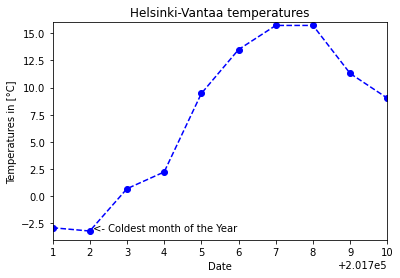

In [201]:
# Define dates needed for plotting
start_time = 201701
end_time   = 201710
cold_time  = 201702


ax = temps2017.plot(style='bo--', title= 'Helsinki-Vantaa temperatures',
                    xlim=[start_time, end_time], ylim=[-4, 16])

ax.set_xlabel('Date')
ax.set_ylabel('Temperatures in [°C]')
ax.text(cold_time, -3.2, ' <- Coldest month of the Year')

__Bar Plot in Pandas__
<br>
By adding `kind= 'bar'` parameter we can plot data using bars

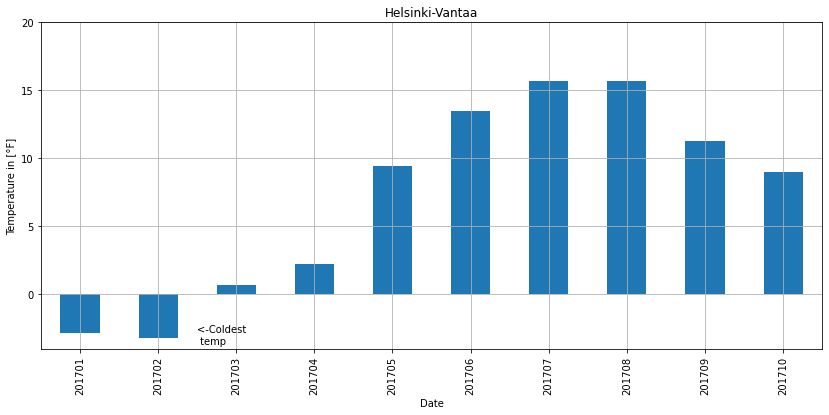

In [225]:
temps2017_bars = temps2017.loc[temps2017.index <= 201710]

#Plot the data
fig, ax = plt.subplots(figsize=(14, 6))

ax = temps2017_bars.plot(kind= 'bar', title= 'Helsinki-Vantaa',
                        ylim= [-4, 20])

ax.set_xlabel('Date')
ax.set_ylabel('Temperature in [°F]')
ax.text(1.5, -4.5, '<-Coldest \n temp \n')
plt.grid()

# Saving plot as an image
# plt.savefig('img/bar-plot.png')

## Interactive Plotting with Pandas-Bokeh
[Pandas-Bokeh Plotting backend](https://github.com/PatrikHlobil/Pandas-Bokeh)

In [226]:
# import module
import pandas_bokeh

pandas_bokeh.output_notebook() # Setting output to be display in Jupyter 
pd.set_option('plotting.backend', 'pandas_bokeh') # Setting the plotting to use Pandas-Bokeh rather than Matplotlib

Loading BokehJS ...

In [301]:
temp2007_to2017_df = data_v2.loc[data_v2.index >= 201701]

start_time = 201701
end_time = 201712

ax = temp2007_to2017_df.plot(title = 'Helsinki-Vantaa Temperature from 2007 Until 2017',
                            xlabel= 'Date', ylabel= 'Temperature [°F]',
                            xlim= [start_time, end_time], ylim= [-6, 20])

__Sample #2__

In [302]:
ax = temp2007_to2017_df.plot(title= 'Helsinki-Vantaa Temperature from 2007 until 2017',
                            xlabel= 'Date', ylabel= 'Temperature [°F]',
                            xlim= [start_time, end_time], ylim= [-6, 20],
                            plot_data_points=True)